## Import Library

In [ ]:
import os # Untuk berinteraksi dengan sistem operasi, misalnya membaca path folder, membuat folder baru
import pandas as pd # untuk manipulasi data berbasis tabel (DataFrame).
from sklearn.model_selection import train_test_split #untuk membagi data jadi data training dan testing/validasi.
import torch #Library utama PyTorch untuk deep learning, semua operasi tensor dan training model dilakukan dengan ini.
from torch.utils.data import Dataset, DataLoader # Untuk membuat custom dataset sendiri
from torchvision import transforms # Berisi fungsi-fungsi transformasi gambar (resize, crop, normalize, dsb).
import torch.nn as nn # untuk modul neural network di PyTorch. Tempat class layer-layer seperti Linear, Conv2d, dsb.
import torch.optim as optim # Modul optimisasi, berisi optimizer seperti SGD, Adam, dsb
from torchvision.models import resnet18, resnet50 # Mengimpor arsitektur model ResNet50 yang sudah tersedia di torchvision.
import time # Untuk mengukur waktu, from torch.autograd import Variable #Untuk membungkus tensor agar bisa otomatis menghitung gradien saat training.
from PIL import Image # Library Python Imaging Library (PIL) untuk membuka dan memanipulasi file gambar.
from sklearn.metrics import classification_report, confusion_matrix # Untuk menghitung dan menampilkan metrik evaluasi seperti precision, recall, f1-score, dan confusion matrix.
import matplotlib.pyplot as plt #untuk membuat visualisasi grafik, seperti plot loss/accuracy atau confusion matrix.

## Data Understanding


In [ ]:
data_path='drive/MyDrive/FaceRecognition/Dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir(data_path)

['class_identity.txt',
 'gender_classification.csv',
 'gender_classification.xlsx',
 'list_attribute.txt',
 'Images',
 '.ipynb_checkpoints',
 'Images_clean']

In [ ]:
Images_folder = '/content/drive/MyDrive/FaceRecognition/Dataset/Images'

In [ ]:
images_list = os.listdir(data_path+'/Images')

In [ ]:
print(images_list)

['041576.jpg', '036679.jpg', '002085.jpg', '051742.jpg', '074516.jpg', '081310.jpg', '103730.jpg', '074485.jpg', '145133.jpg', '035801.jpg', '113211.jpg', '000240.jpg', '085786.jpg', '105598.jpg', '106547.jpg', '049886.jpg', '043233.jpg', '107229.jpg', '103602.jpg', '074539.jpg', '035840.jpg', '069813.jpg', '041412.jpg', '112743.jpg', '161601.jpg', '035407.jpg', '098987.jpg', '041403.jpg', '042853.jpg', '001637.jpg', '074984.jpg', '021161.jpg', '040920.jpg', '104113.jpg', '112529.jpg', '074274.jpg', '035353.jpg', '073981.jpg', '036415.jpg', '042700.jpg', '042861.jpg', '104944.jpg', '001983.jpg', '104417.jpg', '116506.jpg', '000474.jpg', '074374.jpg', '073796.jpg', '074459.jpg', '035166.jpg', '147016.jpg', '038111.jpg', '035265.jpg', '098574.jpg', '059799.jpg', '075859.jpg', '037476.jpg', '041717.jpg', '173279.jpg', '105006.jpg', '000065.jpg', '104115.jpg', '027359.jpg', '041537.jpg', '074836.jpg', '093636.jpg', '078589.jpg', '160576.jpg', '103792.jpg', '166021.jpg', '036141.jpg', '1036

In [ ]:
total_imgs = len(images_list)
print(total_imgs)

5017


In [ ]:
import random
sample_files = random.sample(images_list, 5)

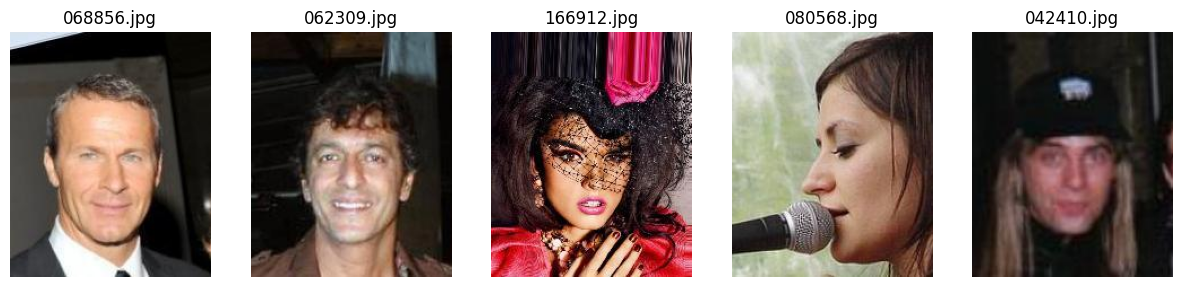

In [ ]:
plt.figure(figsize=(15, 5))
for i, file_name in enumerate(sample_files):
    img_path = os.path.join(Images_folder, file_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
plt.show()

In [ ]:
# Cek isi file list_attribute.txt
df_att = pd.read_csv(data_path+'/list_attribute.txt', sep='\s+', skiprows=1)
print(df_att)


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1659411623.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_att = pd.read_csv(data_path+'/list_attribute.txt', sep='\s+', skiprows=1)


            5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   
000004.jpg                -1               -1           1               -1   
000005.jpg                -1                1           1               -1   
...                      ...              ...         ...              ...   
202595.jpg                -1               -1           1               -1   
202596.jpg                -1               -1          -1               -1   
202597.jpg                -1               -1          -1               -1   
202598.jpg                -1                1           1               -1   
202599.jpg                -1                1           1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_

In [ ]:
print(df_att.columns)
print(df_att.dtypes)

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')
5_o_Clock_Shadow       int64
Arched_Eyebrows        int64
Attractive             int64
Bags_Under_Eyes        int64
Bald                   int64
Bangs                  int64
Big_Lips               int64
Big_Nose               int64
Black_Hair             int64
Blond_Hair             int64
Blurry                 int64
Brown_Hair 

In [ ]:
total_att = len(df_att)
print(total_att)

202599


## Data Preparation





In [ ]:
# Filter nama file dan gambar duplicate
import numpy as np
import hashlib
import shutil
import os

# Buat folder data image mentah dan folder data image setelag di bersihkan
data_path_raw = os.path.join (data_path, 'Images')
data_path_clean = os.path.join (data_path, 'Images_clean')

os.makedirs(data_path_clean, exist_ok=True)

In [ ]:
def image_hash(data_path_raw):
    img = Image.open(data_path_raw).convert("RGB").resize((244, 244))
    arr = np.array(img).tobytes()
    return hashlib.md5(arr).hexdigest()

hashes = {}
unique_files = {}

for filename in os.listdir(data_path_raw):
  src_path = os.path.join(data_path_raw, filename)

  # Filter image duplicate beda nama file
  try:
      h = image_hash(src_path)
  except Exception as e:
      print(f"Error baca {filename}: {e}")
      continue

  # Simpan data image berdasarkan pertama kali muncul
  key = h

  if key not in unique_files:
    unique_files[key] = filename

  # Copy ke folder clean
    dst_path = os.path.join(data_path_clean, filename)
    shutil.copy2(src_path, dst_path)

print("Jumlah asli:", len(os.listdir(data_path_raw)))
print("Jumlah setelah filter:", len(os.listdir(data_path_clean)))

Jumlah asli: 5017
Jumlah setelah filter: 5000


In [ ]:
df_att

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
data = df_att.reset_index().rename(columns={'index': 'image_id'})

In [ ]:
data

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


<Axes: ylabel='Frequency'>

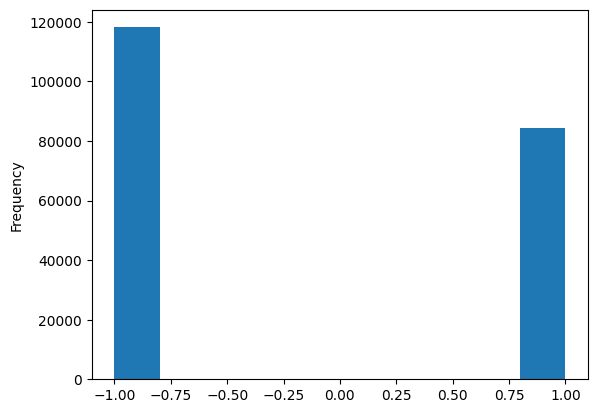

In [ ]:
data_freq = data['Male'].plot(kind='hist')
data_freq

In [ ]:
# split data
train_data, test_data = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
)

# Print columns of train_data and test_data to check for 'image_id'
print("Columns in train_data:", train_data.columns)
print("Columns in test_data:", test_data.columns)

Columns in train_data: Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')
Columns in test_data: Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goa

## Preprocessing

In [ ]:
class GenderDataset(Dataset):
    def __init__(self, data, image_folder_path, transform=None):
        self.data = data
        self.image_folder_path = image_folder_path
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # ambil nama file dari kolom 'image_id'
        filename = self.data.iloc[idx]['image_id']
        image_path = os.path.join(self.image_folder_path, filename)

        # buka image dan convert ke RGB
        image = Image.open(image_path).convert('RGB')

        # ambil label gender dari kolom 'Male'
        # Assuming 'Male' column contains 1 for Male and -1 for Female
        # Convert to 0 for Female and 1 for Male
        gender = 1 if self.data.iloc[idx]['Male'] == 1 else 0


        # apply transform
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(gender, dtype=torch.long)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((244, 244)),           # resize ke 224x224 (ukuran input VGG16)
    transforms.RandomHorizontalFlip(p=0.5),  # augmentasi: flipping kiri/kanan
    transforms.ColorJitter(                  # augmentasi: variasi warna/kontras
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),

    transforms.ToTensor(),                   # ubah ke tensor [0,1]
    transforms.Normalize(                    # normalisasi pakai mean & std ImageNet
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

# folder image clean
image_folder_path = os.path.join(data_path, 'Images_clean')

# Filter missing file
image_folder = os.path.join(data_path, "Images_clean")

# Semua file yang benar-benar ada
available_files = set(os.listdir(image_folder))

# pastikan hanya pakai file yang ada
train_data = train_data[train_data['image_id'].isin(available_files)].reset_index(drop=True)
test_data = test_data[test_data['image_id'].isin(available_files)].reset_index(drop=True)

print("Jumlah train setelah filter:", len(train_data))
print("Jumlah test setelah filter:", len(test_data))

# Data Set
train_set = GenderDataset (
    train_data,
    image_folder_path = image_folder_path,
    transform = transform
    )

train_loader = DataLoader (
    train_set,
    batch_size = 32, # test dengan 8, nilai awal 32
    shuffle=True,
    num_workers = 4,
    pin_memory = True
    )

# Solusi 2: subset dataset
# subset_indices = list(range(2500))   # ambil 20k gambar pertama
# train_subset = Subset(train_set, subset_indices)


# Data Loader
test_set = GenderDataset(
    test_data,
    os.path.join(data_path, 'Images_clean'),
    transform=transform
    )

test_loader = DataLoader(
    test_set,
    batch_size = 32,
    shuffle=False,
    num_workers = 4,
    pin_memory = True
    )

Jumlah train setelah filter: 4031
Jumlah test setelah filter: 957


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## Architecture

In [ ]:
# please define the model optimizer and criterion (loss function)
model = resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Check device, jika ada gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

#model_ft = model_ft.float()
criterion = nn.CrossEntropyLoss()           # defining loss function


optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

criterion = nn.CrossEntropyLoss()           # defining loss function

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


## Modeling

In [ ]:
import time
import torch
import copy
import matplotlib.pyplot as plt # Jangan lupa import matplotlib

def train_model(model, criterion, optimizer, dataloaders, dataset_sizes, use_gpu, num_epochs=10):
    since = time.time()

    # Tambahan: Inisialisasi dictionary untuk menyimpan history
    history = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_epoch = 0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        epoch_start_time = time.time()

        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            phase_start_time = time.time()

            for inputs, labels in dataloaders[phase]:
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            phase_time_elapsed = time.time() - phase_start_time

            epoch_loss = running_loss / dataset_sizes[phase]
            # Konversi tensor akurasi ke float agar mudah di-plot
            epoch_acc = running_corrects.double().item() / dataset_sizes[phase]

            # Tambahan: Simpan loss dan akurasi ke history
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc)
            else: # phase == 'test'
                history['test_loss'].append(epoch_loss)
                history['test_acc'].append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f} | Time: {:.0f}m {:.0f}s'.format(
                phase, epoch_loss, epoch_acc, phase_time_elapsed // 60, phase_time_elapsed % 60))

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_epoch = epoch

        epoch_time_elapsed = time.time() - epoch_start_time
        print('Epoch complete in {:.0f}m {:.0f}s'.format(epoch_time_elapsed // 60, epoch_time_elapsed % 60))
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best test Acc: {:.4f} at Epoch: {}'.format(best_acc, best_epoch))

    model.load_state_dict(best_model_wts)

    # Tambahan: Kembalikan model, history, dan epoch terbaik
    return model, history, best_epoch

In [ ]:
dataloders = {
    "train":train_loader, "test":test_loader
}
dataset_sizes= {
    "train":len(train_set), "test":len(test_set)
}

In [ ]:
use_gpu = torch.cuda.is_available()
print(use_gpu)
if use_gpu:
  # model is a tuple (model, history, best_epoch), extract the model object
  # Removed redundant model.to("cuda") here as it's handled in train_model
  pass

True


In [ ]:
model = train_model(model, criterion, optimizer, dataloders, dataset_sizes, use_gpu, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.1736 Acc: 0.9320 | Time: 1m 21s
test Loss: 0.0908 Acc: 0.9697 | Time: 0m 11s
Epoch complete in 1m 32s

Epoch 1/9
----------
train Loss: 0.0808 Acc: 0.9702 | Time: 0m 44s
test Loss: 0.1456 Acc: 0.9488 | Time: 0m 11s
Epoch complete in 0m 54s

Epoch 2/9
----------
train Loss: 0.0417 Acc: 0.9844 | Time: 0m 43s
test Loss: 0.1278 Acc: 0.9592 | Time: 0m 10s
Epoch complete in 0m 54s

Epoch 3/9
----------
train Loss: 0.0384 Acc: 0.9876 | Time: 0m 44s
test Loss: 0.1134 Acc: 0.9676 | Time: 0m 10s
Epoch complete in 0m 54s

Epoch 4/9
----------
train Loss: 0.0179 Acc: 0.9938 | Time: 0m 45s
test Loss: 0.0945 Acc: 0.9749 | Time: 0m 9s
Epoch complete in 0m 54s

Epoch 5/9
----------
train Loss: 0.0194 Acc: 0.9931 | Time: 0m 49s
test Loss: 0.1309 Acc: 0.9707 | Time: 0m 9s
Epoch complete in 0m 58s

Epoch 6/9
----------
train Loss: 0.0225 Acc: 0.9918 | Time: 0m 44s
test Loss: 0.1118 Acc: 0.9655 | Time: 0m 9s
Epoch complete in 0m 54s

Epoch 7/9
----------
train Loss: 0.01

## Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools # Diperlukan untuk loop yang lebih rapi
from sklearn.metrics import classification_report, confusion_matrix

# Asumsikan 'device' sudah didefinisikan (misal: device = torch.device("cuda:0"))

def evaluate_model(model, test_loader, target_labels):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_preds = []

    # Iterasi data tanpa menghitung gradien
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Classification Report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=target_labels))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:")
    print(cm)

    # --- BAGIAN PLOTTING YANG DIMODIFIKASI ---
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(target_labels))
    plt.xticks(tick_marks, target_labels, rotation=45)
    plt.yticks(tick_marks, target_labels)

    # Tambahan: Loop untuk menambahkan teks nilai di dalam kotak
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.97      0.97       579
        male       0.95      0.98      0.96       378

    accuracy                           0.97       957
   macro avg       0.97      0.97      0.97       957
weighted avg       0.97      0.97      0.97       957


Confusion Matrix:
[[559  20]
 [  9 369]]


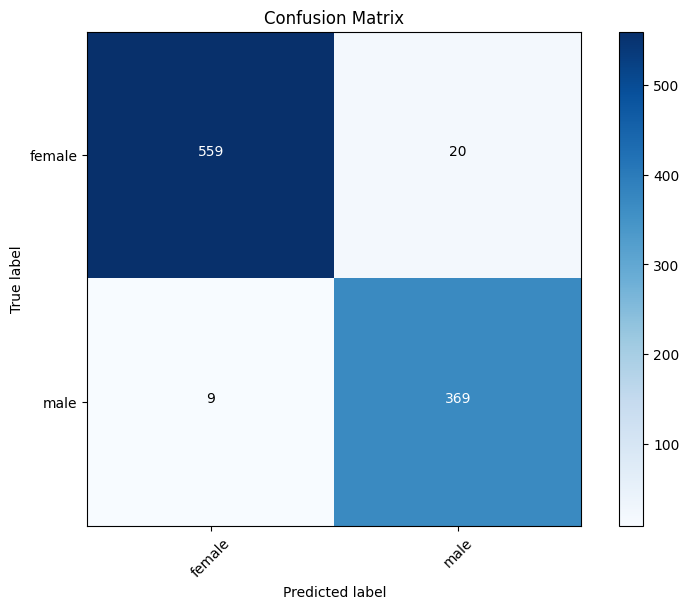

In [ ]:
evaluate_model(model[0], dataloders['test'], ["female", "male"])